<a href="https://colab.research.google.com/github/Deividasbu/Data-Science-projects/blob/main/2016%20US%20Elections.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2016 US presidential elections**

## Project Requirements
#### Exploratory Data Analysis
- Describe the data with basic statistical parameters - mean, median, quantiles, etc.   
- Use parameters that give you the most important statistical insights of the data.
- Grouping the data and analyzing the groups - using Pandas aggregate methods.
- Work with features - handle missing data if needed, use pandas date APIs.
- Manipulate datasets - use joins in needed.
- Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.    

### Statistical hypothesis testing
- Use at least one statistical significance test.
- Report p-values.
- Use visualizations.  

### Modeling  
- Visualize data with dimensionality reduction algorithms.
- Perform cluster analysis.
- Use a linear model to explain relationships and predict new values.

In [1]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Reading datasets
county = pd.read_csv('county_facts.csv')
columns = pd.read_csv('county_facts_dictionary.csv')
results = pd.read_csv('primary_results.csv')
del results['fips']

## **Exploratory Data Analysis**

In [3]:
county.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,SEX255214,RHI125214,RHI225214,RHI325214,RHI425214,RHI525214,RHI625214,RHI725214,RHI825214,POP715213,POP645213,POP815213,EDU635213,EDU685213,VET605213,LFE305213,HSG010214,HSG445213,HSG096213,HSG495213,HSD410213,HSD310213,INC910213,INC110213,PVY020213,BZA010213,BZA110213,BZA115213,NES010213,SBO001207,SBO315207,SBO115207,SBO215207,SBO515207,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,50.8,77.4,13.2,1.2,5.4,0.2,2.5,17.4,62.1,84.9,12.9,20.7,86.0,28.8,21263779,25.5,133957180,64.9,26.0,176700,115610216,2.63,28155,53046,15.4,7488353,118266253,2.0,23005620,27092908,7.1,0.9,5.7,0.1,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,51.5,69.7,26.7,0.7,1.3,0.1,1.5,4.1,66.2,85.0,3.5,5.2,83.1,22.6,388865,24.2,2207912,69.7,15.9,122500,1838683,2.55,23680,43253,18.6,97578,1603100,1.1,311578,382350,14.8,0.8,1.8,0.1,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,51.4,77.9,18.7,0.5,1.1,0.1,1.8,2.7,75.6,85.0,1.6,3.5,85.6,20.9,5922,26.2,22751,76.8,8.3,136200,20071,2.71,24571,53682,12.1,817,10120,2.1,2947,4067,15.2,0.0,1.3,0.0,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,51.2,87.1,9.6,0.7,0.9,0.1,1.6,4.6,83.0,82.1,3.6,5.5,89.1,27.7,19346,25.9,107374,72.6,24.4,168600,73283,2.52,26766,50221,13.9,4871,54988,3.7,16508,19035,2.7,0.4,1.0,0.0,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,46.6,50.2,47.6,0.6,0.5,0.2,0.9,4.5,46.6,84.8,2.9,5.0,73.7,13.4,2120,24.6,11799,67.7,10.6,89200,9200,2.66,16829,32911,26.7,464,6611,-5.6,1546,1667,0.0,0.0,0.0,0.0,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [4]:
results.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,Democrat,Bernie Sanders,222,0.078


In [5]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               24611 non-null  object 
 1   state_abbreviation  24611 non-null  object 
 2   county              24611 non-null  object 
 3   party               24611 non-null  object 
 4   candidate           24611 non-null  object 
 5   votes               24611 non-null  int64  
 6   fraction_votes      24611 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


### Total votes received by both parties candidates

In [6]:
# total votes received by democrat candidates
democrats = results[results['party'] == 'Democrat']
total_demo = democrats.groupby(['candidate'])['votes'].sum().sort_values(ascending=False)
total_demo.head()

candidate
Hillary Clinton    15692452
Bernie Sanders     11959102
 No Preference         8152
Martin O'Malley         752
 Uncommitted             43
Name: votes, dtype: int64

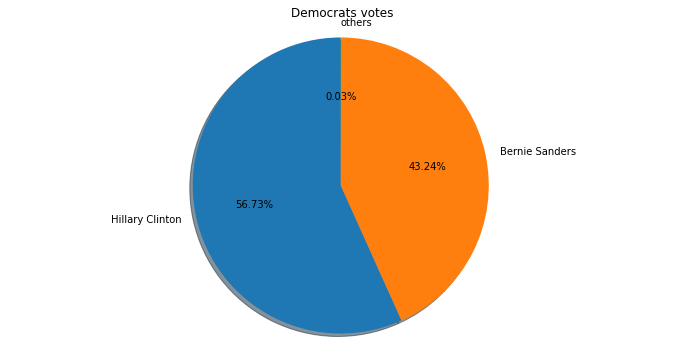

In [7]:
# democrats total votes pie chart 
total_demo_df = pd.DataFrame(
    data = {'candidate': total_demo.index, 'value' :total_demo.values})

#top 2 
top_demo = total_demo_df[:2].copy()

#others
others = pd.DataFrame(data = {
    'candidate' : ['others'],
    'value' : [total_demo_df['value'][2:].sum()]
})

top_demo = pd.concat([top_demo, others])

labels = top_demo['candidate']
sizes = top_demo['value']

fig1, ax1 = plt.subplots(figsize = (12,6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.set_title('Democrats votes')
ax1.axis('equal');

In [8]:
# total votes of rupublicans candidates
republicans = results[results['party'] == 'Republican']
total_repub = republicans.groupby(['candidate'])['votes'].sum().sort_values(ascending=False)
total_repub

candidate
Donald Trump      13302541
Ted Cruz           7603006
John Kasich        4159949
Marco Rubio        3321076
Ben Carson          564553
Jeb Bush             94411
Chris Christie       24353
Carly Fiorina        15191
Rand Paul             8479
Mike Huckabee         3345
Rick Santorum         1782
Name: votes, dtype: int64

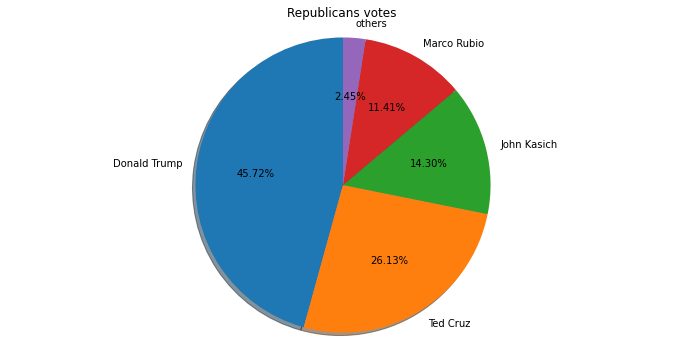

In [9]:
# republican total votes pie chart
total_repub_df = pd.DataFrame(
    data = {'candidate': total_repub.index, 'value' :total_repub.values})

#top 2 
top_repub = total_repub_df[:4].copy()

#others
others = pd.DataFrame(data = {
    'candidate' : ['others'],
    'value' : [total_repub_df['value'][4:].sum()]
})

top_repub = pd.concat([top_repub, others])

labels = top_repub['candidate']
sizes = top_repub['value']

fig1, ax1 = plt.subplots(figsize = (12,6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=90)
ax1.set_title('Republicans votes')
ax1.axis('equal');

### Democrats and Republicans candidates separability based on voters demographics

In [10]:
#filtering data to only have one winner for county in repulicans elections
idx = republicans.groupby(['state_abbreviation', 'county'])['votes'].transform(max) == republicans['votes']
winners_repub = republicans[idx]

#filtering data to only have one winner for county in democrats elections
idx2 = democrats.groupby(['state_abbreviation', 'county'])['votes'].transform(max) == democrats['votes'] 
winners_demo = democrats[idx2]

In [11]:
#modifying demographics data frame to have relevant columns and its names
demographics = county[['state_abbreviation', 'area_name', 'RHI825214', 'RHI225214', 'RHI725214', 'EDU685213', 
                       'INC110213', 'PVY020213', 'AGE775214', 'POP645213', 'SEX255214']]
demographics.columns = ['state_abbreviation', 'county', 'White', 'Black or African American', 
                        'Hispanic', 'College', 'Income', 'Poverty', 'Age_65+', 'Foreign_born', 'Female'] 
demographics.head()

,state_abbreviation,county,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female
0,NaN,United States,62.1,13.2,17.4,28.8,53046,15.4,14.5,12.9,50.8
1,NaN,Alabama,66.2,26.7,4.1,22.6,43253,18.6,15.3,3.5,51.5
2,AL,Autauga County,75.6,18.7,2.7,20.9,53682,12.1,13.8,1.6,51.4
3,AL,Baldwin County,83.0,9.6,4.6,27.7,50221,13.9,18.7,3.6,51.2
4,AL,Barbour County,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6


In [12]:
# merging demographics data with republicans winners
demographics_copy = demographics.copy()
demographics_copy['county'] = demographics['county'].str.replace(' County', '')

# merging filtered data to demographics
combined_repub_win = pd.merge(winners_repub, demographics_copy, how="inner", on=["state_abbreviation", "county"])
combined_demo_win = pd.merge(winners_demo, demographics_copy, how="inner", on=["state_abbreviation", "county"])
combined_demo_win.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female
0,Alabama,AL,Autauga,Democrat,Hillary Clinton,2387,0.800,75.6,18.7,2.7,20.9,53682,12.1,13.8,1.6,51.4
1,Alabama,AL,Baldwin,Democrat,Hillary Clinton,5290,0.647,83.0,9.6,4.6,27.7,50221,13.9,18.7,3.6,51.2
2,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6
3,Alabama,AL,Bibb,Democrat,Hillary Clinton,942,0.755,74.5,22.1,2.1,12.1,36447,18.1,14.8,1.2,45.9
4,Alabama,AL,Blount,Democrat,Hillary Clinton,564,0.551,87.8,1.8,8.7,12.1,44145,15.8,17.0,4.3,50.5


#### Republicans candidates separability

In [13]:
# comparison of republican candidates
combined_repub_win.groupby(['candidate'])['Income', 'White',  'Black or African American', 'Hispanic', 'College'].mean().round(2)

,Income,White,Black or African American,Hispanic,College
candidate,,,,,
Ben Carson,31104.50,43.65,1.05,53.80,13.35
Donald Trump,44257.39,78.32,10.55,6.82,18.67
John Kasich,50012.64,86.59,5.43,4.94,21.71
Marco Rubio,63645.03,61.86,17.02,13.83,40.24
Ted Cruz,46776.45,72.46,5.90,17.70,19.53


In [14]:
combined_repub_win.candidate.value_counts()

Donald Trump    1947
Ted Cruz         601
John Kasich       61
Marco Rubio       29
Ben Carson         2
Name: candidate, dtype: int64

In [15]:
# there were basically two main opponents in republicns party, lets filter them
candidates = ['Donald Trump', 'Ted Cruz']
two_winners_repub = combined_repub_win.loc[combined_repub_win['candidate'].isin(candidates)]

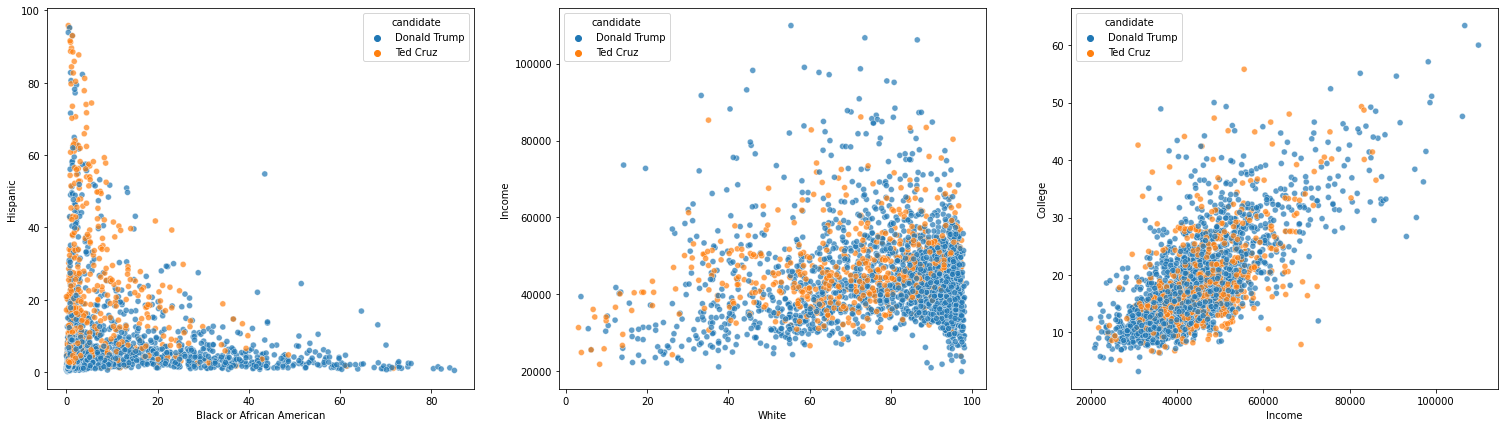

In [16]:
# plotting a scatter on demographics with hue on candidate
plt.figure(figsize=(26,7))
plt.subplot(1,3,1)
sns.scatterplot(x='Black or African American', y='Hispanic', data=two_winners_repub, hue = 'candidate', alpha=0.7)
plt.subplot(1,3,2)
sns.scatterplot(x='White', y='Income', data=two_winners_repub, hue = 'candidate', alpha=0.7)
plt.subplot(1,3,3)
sns.scatterplot(x='Income', y='College', data=two_winners_repub, hue = 'candidate', alpha=0.7)

#### Democrats candidates separability

In [17]:
# comparison of democrats candidates
combined_demo_win.groupby(['candidate'])['Income', 'White',  'Black or African American', 'Hispanic', 'College'].mean().round(2)

,Income,White,Black or African American,Hispanic,College
candidate,,,,,
Bernie Sanders,46552.67,85.64,2.36,6.62,20.73
Hillary Clinton,44620.15,70.91,14.20,11.54,18.55


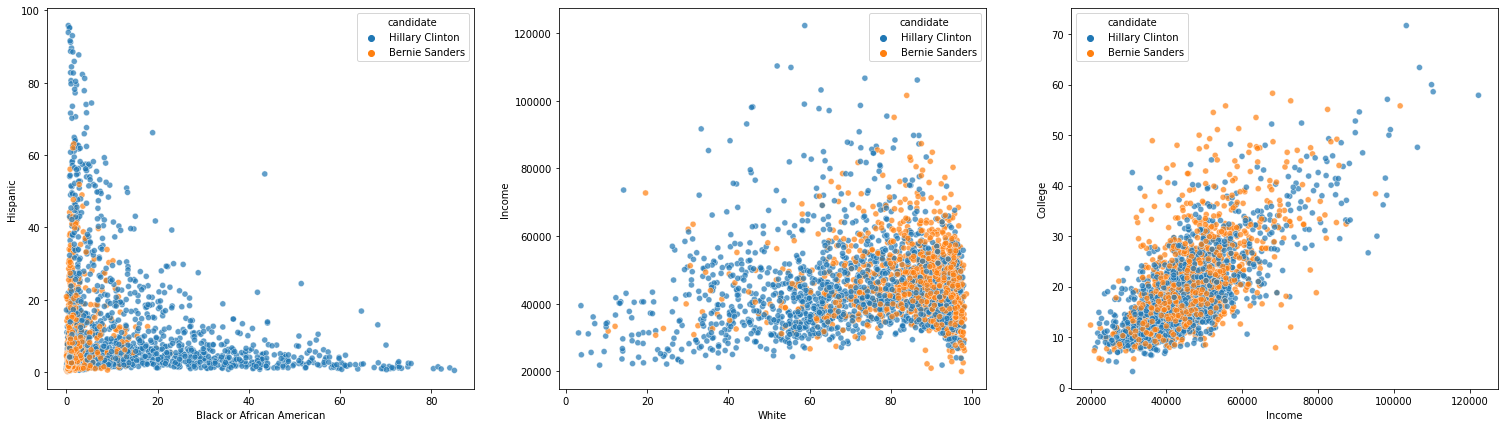

In [18]:
plt.figure(figsize=(26,7))
plt.subplot(1,3,1)
sns.scatterplot(x='Black or African American', y='Hispanic', data=combined_demo_win, hue = 'candidate', alpha=0.7)
plt.subplot(1,3,2)
sns.scatterplot(x='White', y='Income', data=combined_demo_win, hue = 'candidate', alpha=0.7)
plt.subplot(1,3,3)
sns.scatterplot(x='Income', y='College', data=combined_demo_win, hue = 'candidate', alpha=0.7)

### Insights  

**Republicans elections**

Donald Trump is supported more by black people - Ted Cruz by hispanic. 
Most of the Trump's supporters are white people with average income.
Marco Rubio wins in counties where average income is highest. 
There is no big difference between average Trump's and Rubio suporters income and education level.   

**Democrat elections**
  
Bernie Sanders has way less hispanic and black people among his supporters than Hillary - most of them white.   
Hilllary's votters on average has lower income and education compared to Sanders. 



### Fraction of votes dependence on Donald Trump's and Hillary Clinton's most supporting states demographies

In [19]:
# preparing data
idx3 = results.groupby(['state_abbreviation', 'county'])['votes'].transform(max) == results['votes']
winners = results[idx3]

combined_winners = pd.merge(winners, demographics_copy, how="inner", on=["state_abbreviation", "county"])
combined_winners = combined_winners[combined_winners['fraction_votes'] != 0]
trump_won = combined_winners[combined_winners['candidate'] == 'Donald Trump']
hillary_won = combined_winners[combined_winners['candidate'] == 'Hillary Clinton']

Here is how the filtering works. Only the candidate which received highest number of votes in the county is filtered out:  

![](https://drive.google.com/uc?export=view&id=1OOEOMU9674L2v65WsgIshiiWMqp-vRCh)  

#### Trump's top 5 states

In [20]:
trump_won.groupby(['state'])['fraction_votes'].mean().sort_values(ascending = False)[:5] 

state
New Jersey       0.805556
California       0.805000
Washington       0.780231
West Virginia    0.779919
New Mexico       0.759333
Name: fraction_votes, dtype: float64

In [21]:
# data from top 5 states
states = ['NJ', 'WV', 'WA', 'CA','NM']
top_trump_states = trump_won.loc[trump_won['state_abbreviation'].isin(states)]

#### Hillary's top 5 states

In [22]:
hillary_won.groupby(['state'])['fraction_votes'].mean().sort_values(ascending = False)[:5]

state
Mississippi       0.870368
South Carolina    0.828469
Georgia           0.818250
Alabama           0.809769
Tennessee         0.804800
Name: fraction_votes, dtype: float64

In [23]:
# data from top 5 states
states = ['MS','TN','SC', 'AL', 'GA']
top_hillary_states = hillary_won.loc[hillary_won['state_abbreviation'].isin(states)]

#### Regression and desity plots for states comparison

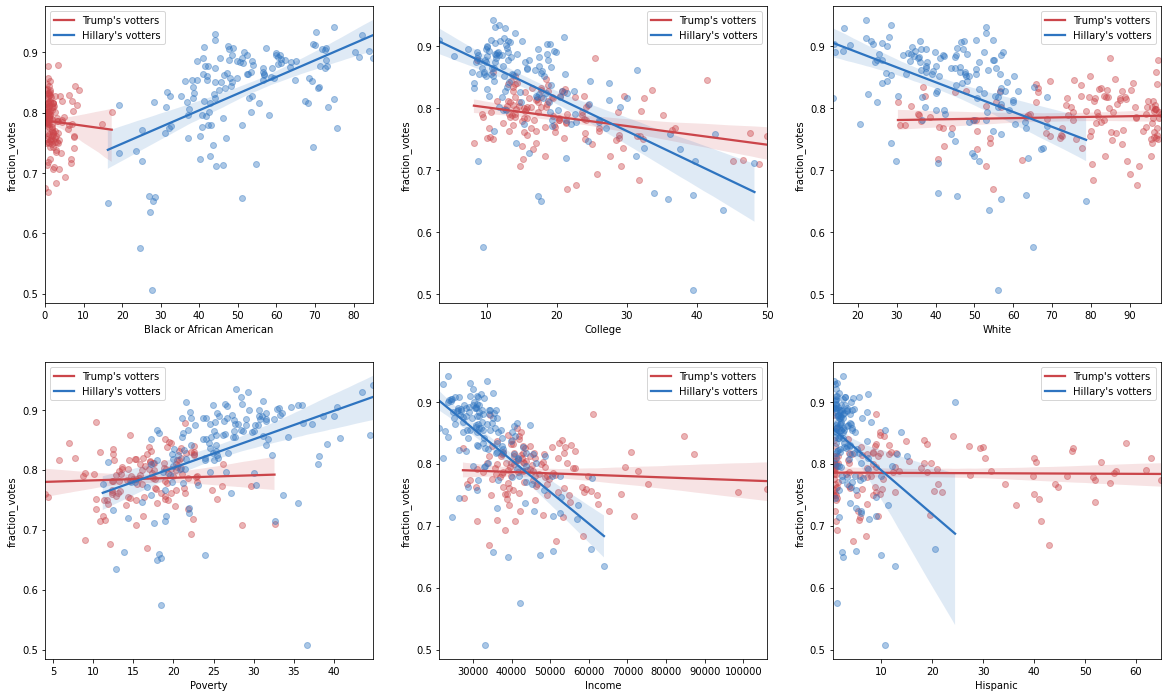

In [24]:
colors = ["#CB454A", "#2E74C0"]
sns.set_palette(sns.color_palette(colors))

columns = ['Black or African American',	'College', 'White', 'Poverty', 'Income', 'Hispanic']

fig = plt.figure(figsize=(20,12))

a = 2  # number of rows
b = 3  # number of columns
c = 1

for i in columns:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.regplot(data = top_trump_states, x = i, y = 'fraction_votes', scatter_kws={'alpha':0.4})
    sns.regplot(data = top_hillary_states, x = i, y = 'fraction_votes', scatter_kws={'alpha':0.4})
    plt.legend(labels=["Trump's votters", "Hillary's votters"])
    c = c + 1


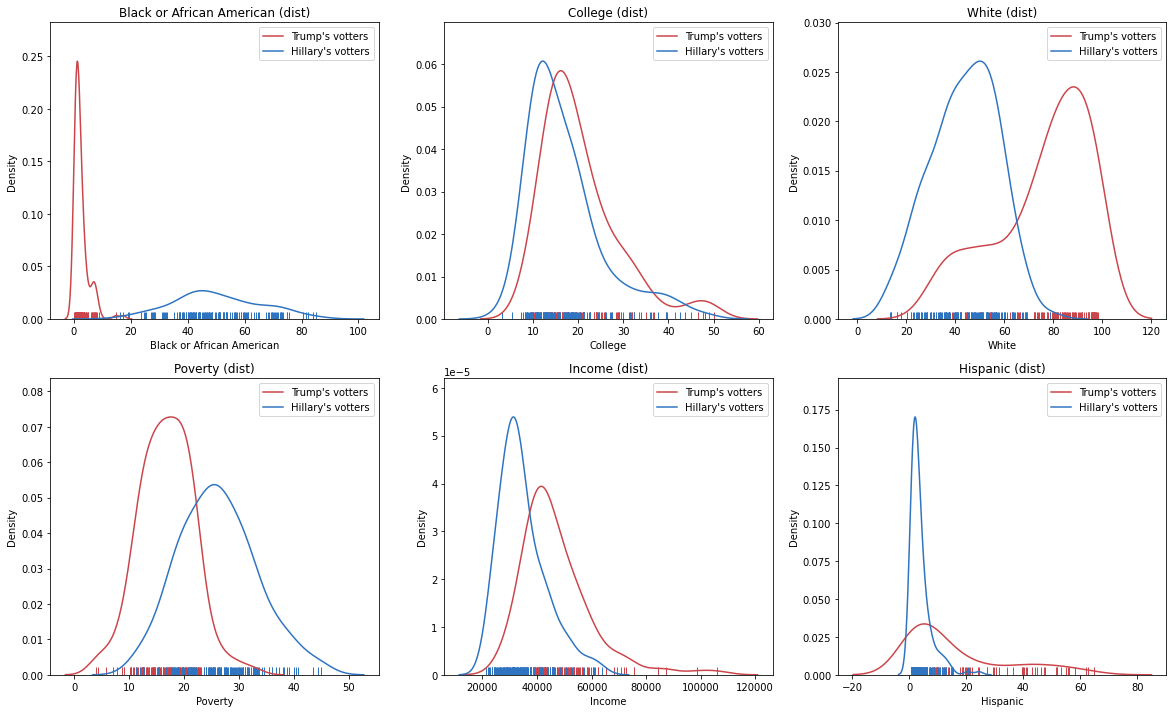

In [25]:
# Comparison of demographics between Trump and Hillary's top states

a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(20,12))
columns = ['Black or African American',	'College', 'White', 'Poverty', 'Income', 'Hispanic']

for i in columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i))
    plt.xlabel(i)
    sns.distplot(top_trump_states[i], hist=False, rug=True)
    sns.distplot(top_hillary_states[i], hist=False, rug=True)
    plt.legend(labels=["Trump's votters", "Hillary's votters"])
    c = c + 1

plt.show()

In [26]:
# average values of demographics for candidates top states
h_top_mean = top_hillary_states.mean().round(2).to_frame().T
t_top_mean = top_trump_states.mean().round(2).to_frame().T

comparison_of_tops = pd.concat([t_top_mean, h_top_mean], axis=0)
comparison_of_tops['candidate'] = ['Donald Trump', 'Hillary Clinton']
comparison_of_tops

,votes,fraction_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female,candidate
0,9393.32,0.79,75.64,2.46,16.10,20.47,47038.39,16.84,18.59,7.29,49.75,Donald Trump
0,7256.28,0.83,43.75,50.30,3.91,17.10,34781.46,26.16,15.71,3.12,50.89,Hillary Clinton


### Insights

**Pro-trump states:**  
*   New Jersey
*   California
*   Washington
*   West Virginia
*   New Mexico

**Pro-Clinton states:**
*   Mississippi 
*   South Carolina 
*   Georgia
*   Alabama   
*   Tennessee 

**Differences between top states and its effect on fraction of votes received:**    
  
Hillary's fraction of votes hugely increase with the fraction of black people in the state and decrease with percent of white people. Higher level of poverty increases votes, higher income, college and hispanic - decrease. 
  
The majority of people in top Trump states are white - whiteness increase the fraction of votes he gets. Basically no black people lives in his top states, their increase should decrease the votes. 
Higher income and education slightly lovers fraction of votes, but less than in Hillary's states. The increase in poverty is weakly positively correlated with votes increase. 
  
Regarding populations, Hillary's most suporting states have on average a little bit lower education and income, higher poverty level, more black and hispani, less white people.

### Fraction of votes dependence on demographics of counties where Donald Trump and Hillary Clinton won (All counties/states).

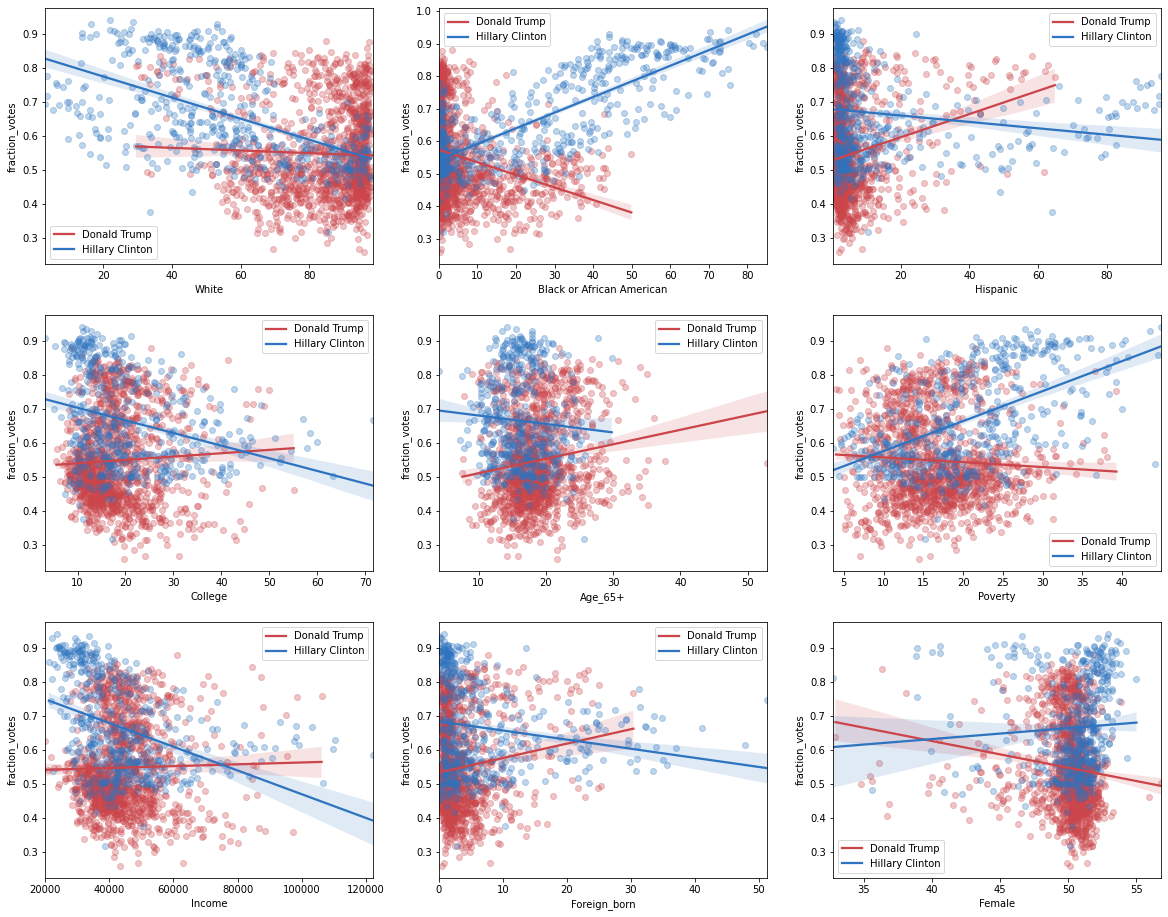

In [27]:
columns = ['White',	'Black or African American',	'Hispanic',	'College',	'Age_65+', 'Poverty', 'Income', 'Foreign_born', 'Female']

fig = plt.figure(figsize=(20,16))

a = 3  # number of rows
b = 3  # number of columns
c = 1

for i in columns:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.regplot(data = trump_won, x = i, y = 'fraction_votes', scatter_kws={'alpha':0.3})
    sns.regplot(data = hillary_won, x = i, y = 'fraction_votes', scatter_kws={'alpha':0.3})
    plt.legend(labels=['Donald Trump', 'Hillary Clinton'])
    c = c + 1

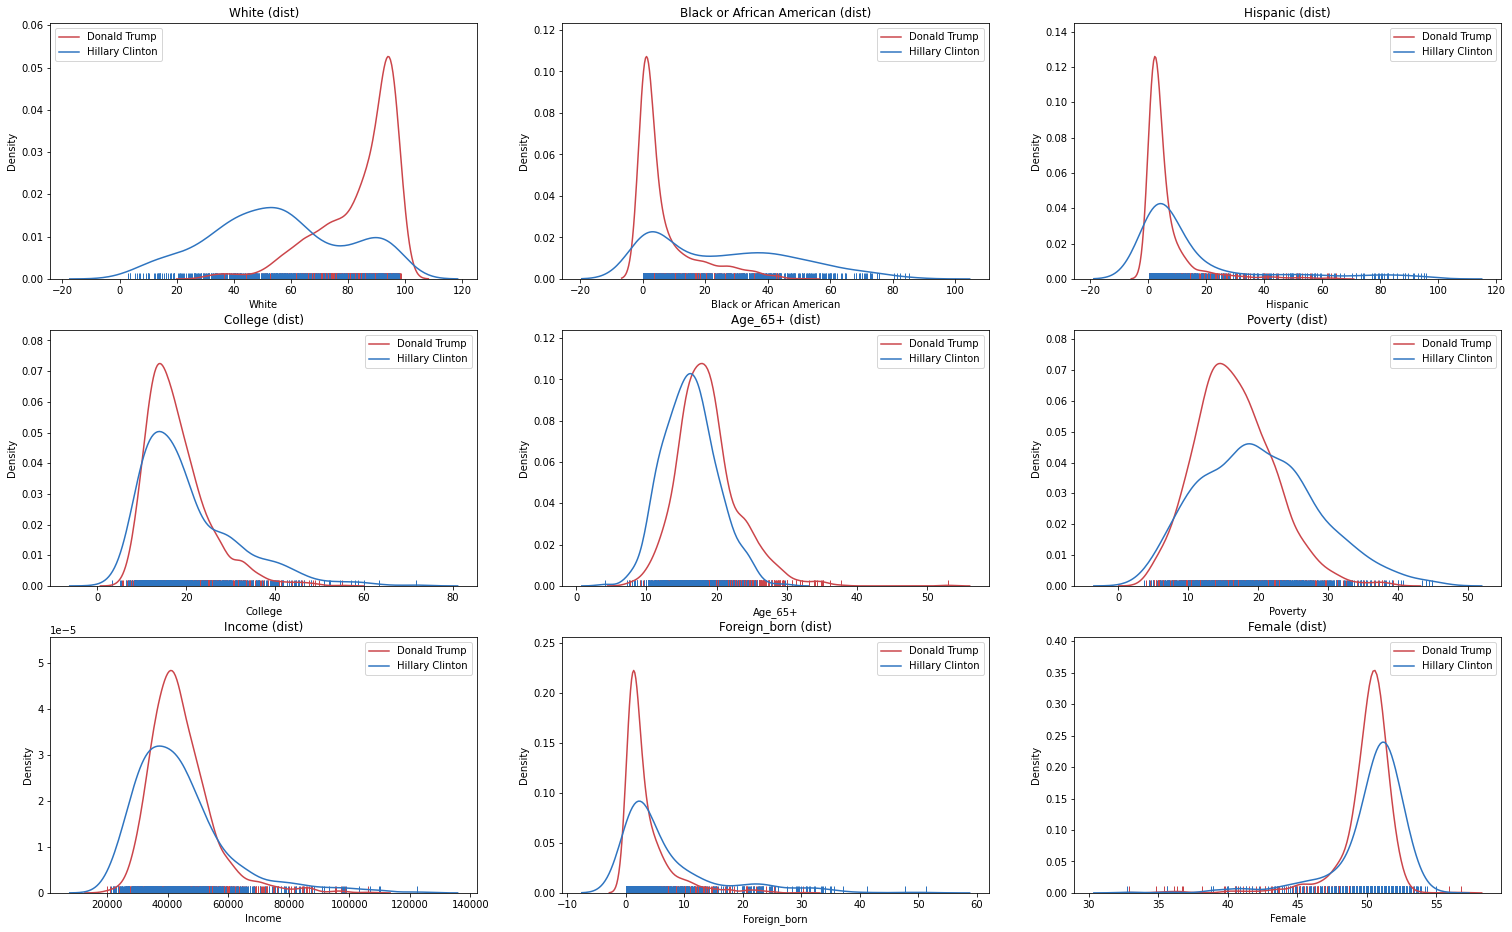

In [28]:

a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(26,16))
columns = ['White',	'Black or African American',	'Hispanic',	'College',	'Age_65+', 'Poverty', 'Income', 'Foreign_born', 'Female']

for i in columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i))
    plt.xlabel(i)
    sns.distplot(trump_won[i], hist=False, rug=True)
    sns.distplot(hillary_won[i], hist=False, rug=True)
    plt.legend(labels=['Donald Trump', 'Hillary Clinton'])
    c = c + 1

plt.show()

In [29]:
# average values of demographics for candidates all states
h_all_mean = hillary_won.mean().round(2).to_frame().T
t_all_mean = trump_won.mean().round(2).to_frame().T

comparison_of_tops = pd.concat([t_all_mean, h_all_mean], axis=0)
comparison_of_tops['candidate'] = ['Donald Trump', 'Hillary Clinton']
comparison_of_tops

,votes,fraction_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female,candidate
0,4630.63,0.55,84.07,6.53,5.88,17.92,44286.79,16.66,18.73,3.38,49.95,Donald Trump
0,15509.09,0.67,55.45,25.41,14.65,20.33,44025.00,20.11,16.23,6.98,50.29,Hillary Clinton


### Insights 
When all counties where candidates won are compared, patterns do not change much.   
Hillary's votes strongly negtively correlates with the fraction of white people, average college and income. Her votes increase with the fraction of black people, women and poverty level in the county.
Higher fraction of hispanic people leads to lower fraction of votes for hillary.     
Trump's votes stronlgy negatively correlates with fraction of black people and female, positively correlates with average hispanic, college, income, foreigners born.
Higher poverty slightly positively correlates with fraction of votes for Trump.  
Interesting that Hillary's votes negatively correlates with fraction of people older than 65, Trump's - positively. 

## **Statistical hypothesis testing**

#### Comparing difference between average votes in counties won between Hilary Clinton and Donald Trump  
  
  H0: x_bar(votes_hillary) = x_bar(votes_hillary)  
  H1: x_bar(votes_hillary) != x_bar(votes_hillary)

In [30]:
from scipy import stats as st

h_votes = hillary_won.votes
t_votes = trump_won.votes

stat, p = st.ttest_ind(h_votes, t_votes, equal_var = False)
print('t_stat=%.3f, p_value=%.3f' % (stat, p))
if abs(stat) < 1.96:
  print('Fail to reject the null')
else: 
  print('Reject the null')

t_stat=6.193, p_value=0.000
Reject the null


Given a huge sample size, critical t-value for 95% confidence is 1.96. Our calculated absolute t_value is 6.193 and p_value is basically zero. Therefore we reject the null hypothesis and conclude that mean votes received are different among opponents. 

In [31]:
# We can test the hypothesis by calculating ourselves, the result is identical to the one above

difference_betweeen_means = h_votes.mean() - t_votes.mean()

standard_error = np.sqrt(h_votes.var()/h_votes.shape[0] + t_votes.var()/t_votes.shape[0])

t = difference_betweeen_means/standard_error
t.round(3)

6.193

##### 95% Confidence Incerval for difference in average votes_fractions.

In [32]:
confidence_95 = st.norm.interval(alpha=0.95, loc = difference_betweeen_means, scale = standard_error)
confidence_95 = (round(confidence_95[0], 3), round(confidence_95[1], 3))
print('95% concfidence interval for difference between fractions:', confidence_95)

95% concfidence interval for difference between fractions: (7435.449, 14321.483)


We can see that during another identical elections, the diffrence between average Hillary votes and average Trump votes would be between [7435 : 14321] 

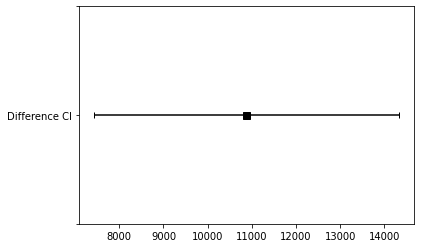

In [33]:
x = [difference_betweeen_means]
y = [1]
error = [1.96*standard_error]

plt.figure()
plt.errorbar(x, y, xerr=error, color = 'black', capsize=3, marker = 's', markersize = 7, mfc = 'black', mec='black')
plt.yticks((0,1,2), ('', 'Difference CI', ''));

#### Testing other assumptions 



It is sometimes assumed that Trump supporters have a lower income and lack of education. However, this is not very visible in the graphs presented above.   
Also, Trump called Mexicans “rapists” and “killers” - maybe hispanic and black people avoid voting for Trump? Lets see whether fraction of white, hispanic and black people statistically differs among opponents states and test all these assumptions at 95% significance level.

columns = [College, Income, White (non-Hispanic),	Black or African American,	Hispanic]

H0: x_bar(average [column] hillary) = x_bar(averge [column] trump)  
H1: x_bar(average [column] hillary) != x_bar(average [column] hillary)

In [34]:
columns = ['College', 'Income', 'White',	'Black or African American',	'Hispanic']

for i in columns:
  stat, p = st.ttest_ind(hillary_won[i], trump_won[i], equal_var = False)
  print(i,': t_stat=%.3f, p_value=%.3f' % (stat, p))
  if abs(stat) < 1.96:
    print('Fail to reject the null')
  else: 
    print('Reject the null')

College : t_stat=4.600, p_value=0.000
Reject the null
Income : t_stat=-0.345, p_value=0.730
Fail to reject the null
White : t_stat=-25.344, p_value=0.000
Reject the null
Black or African American : t_stat=18.052, p_value=0.000
Reject the null
Hispanic : t_stat=8.571, p_value=0.000
Reject the null


We can see that that calculated absolute t_value is higher than 1.96 and p_value exeeds 0.05 for college, white, black and hispanic grous.  
**We reject the null hypotheses** at 95% and conclude that average of College, as well as averages of White, Hispanic and Black people are statistically different among canidates supporters.

We fail to reject the null for Income group, because calculated t-value is smaller than 1.96.

We can see tat t-statistics are positive for college, black and hispanic groups. This means that it is Hillary's supporters who have higher average education.  

Trump has more white supporters, whereas Hillary has statistically higher averages of black and hispanic people as her supporters. 


## **Modeling**

### Data visualization using dimesionality reduction algorithms

In [35]:
# Data for PCA, t-SNE, and k-means
candidates = ['Donald Trump', 'Hillary Clinton']
two_winners = combined_winners.loc[combined_winners['candidate'].isin(candidates)]
two_winners.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female
0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6
1,Alabama,AL,Bullock,Democrat,Hillary Clinton,2451,0.913,22.1,70.1,7.5,12.5,32033,21.6,14.9,5.4,45.3
2,Alabama,AL,Butler,Democrat,Hillary Clinton,2196,0.921,53.1,44.0,1.2,14.0,29918,28.4,18.0,0.8,53.6
3,Alabama,AL,Chambers,Democrat,Hillary Clinton,2899,0.886,56.8,39.5,2.0,11.8,32402,24.1,18.3,1.1,52.3
4,Alabama,AL,Choctaw,Democrat,Hillary Clinton,1772,0.802,56.1,42.4,0.8,11.8,33941,21.5,20.8,0.3,52.5


In [36]:
# selecting features for dimentionality reduction, their standardizing

features = ['votes', 'fraction_votes', 'White',	'Black or African American',	'Hispanic',	
            'College',	'Income',	'Poverty',	'Age_65+',	'Foreign_born',	'Female']

x = two_winners.loc[:, features].values

y = two_winners.candidate

#### PCA

In [37]:
# Standartizing data, performing PCA

from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_scaled)

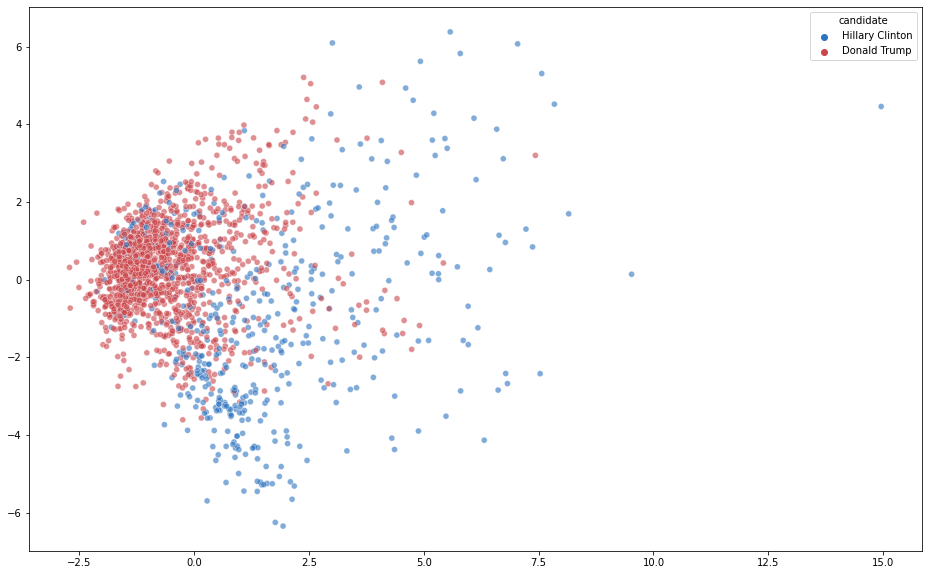

In [38]:
# scattereplot of data in two dimensions
colors = ["#2E74C0", "#CB454A"]
sns.set_palette(sns.color_palette(colors))

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=principalComponents[:, 0], y=principalComponents[:, 1],
    hue=two_winners.candidate, legend="full", alpha=0.6)

In [39]:
# variance explained by only those two components
pca.explained_variance_ratio_

array([0.27774299, 0.25903003])

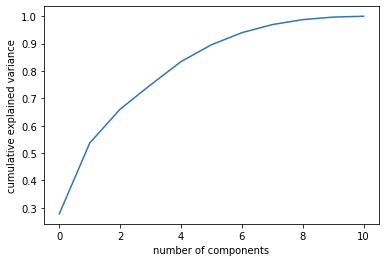

In [40]:
# cumulative exlained variance graph 
pca = PCA().fit(x_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We can see that even though around 50% of information was lost after dimentionality reduction, our data still shows some separability between the candidates. 

#### t-SNE

In [41]:
#performing t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(x_scaled)

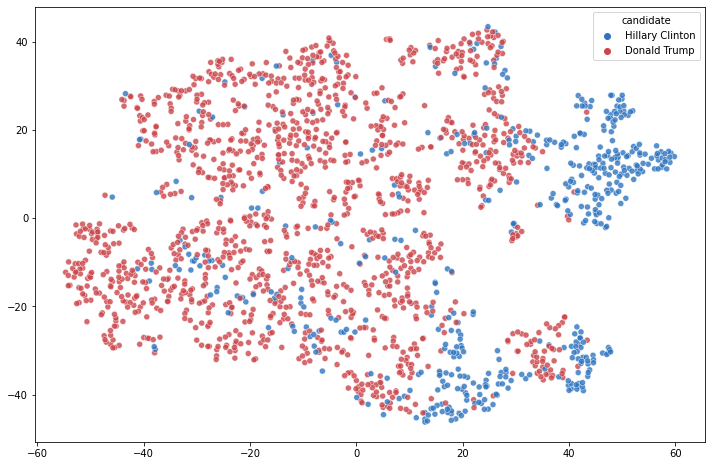

In [42]:
# ploting t-SNE to see similiarities in data
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1], hue=two_winners.candidate,
    alpha = 0.8)

### Cluster analysis

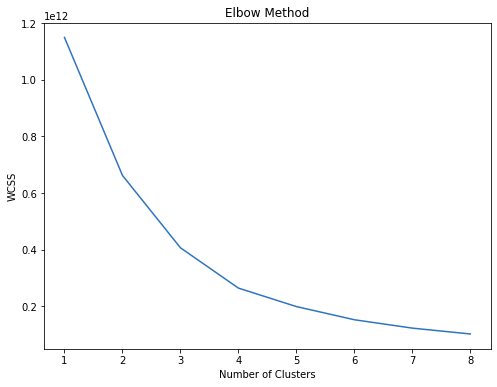

In [43]:
# seeing what is the optimal number of clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range(1,9):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,6))
plt.plot(range(1,9), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
# data has different scales, threfore we use MinMaxScaler before clustering
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)

# doing k-means
kmeans = KMeans(n_clusters = 3, random_state=0)
y_kmeans = kmeans.fit_predict(scaled)

Text(0.5, 1.0, 'Clusters')

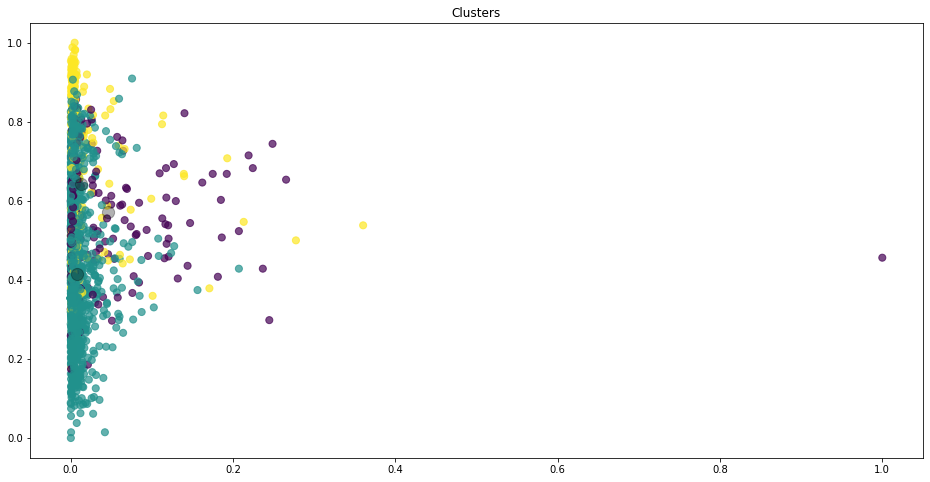

In [45]:
# plotting clusters
plt.figure(figsize=(16,8))
plt.scatter(scaled[:, 0], scaled[:, 1], c=y_kmeans, s=50, alpha = 0.7)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.3);
plt.title('Clusters')

In [46]:
# adding cluster number to the prior data set
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

two_winners.reset_index(drop=True, inplace=True)
kmeans.reset_index(drop=True, inplace=True)

df_cluster = pd.concat([two_winners, kmeans], axis=1)
df_cluster.head()

,state,state_abbreviation,county,party,candidate,votes,fraction_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female,k_cluster
0,Alabama,AL,Barbour,Democrat,Hillary Clinton,2567,0.906,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6,2
1,Alabama,AL,Bullock,Democrat,Hillary Clinton,2451,0.913,22.1,70.1,7.5,12.5,32033,21.6,14.9,5.4,45.3,2
2,Alabama,AL,Butler,Democrat,Hillary Clinton,2196,0.921,53.1,44.0,1.2,14.0,29918,28.4,18.0,0.8,53.6,2
3,Alabama,AL,Chambers,Democrat,Hillary Clinton,2899,0.886,56.8,39.5,2.0,11.8,32402,24.1,18.3,1.1,52.3,2
4,Alabama,AL,Choctaw,Democrat,Hillary Clinton,1772,0.802,56.1,42.4,0.8,11.8,33941,21.5,20.8,0.3,52.5,2


In [47]:
# Comparison of mean demographics between clusters
df_cluster.groupby(['k_cluster'])['White', 'Black or African American', 'Hispanic', 'College', 'Income', 'Age_65+'].mean().round(2)

,White,Black or African American,Hispanic,College,Income,Age_65+
k_cluster,,,,,,
0,43.47,7.08,42.46,23.09,50976.02,15.00
1,87.49,4.94,4.38,18.63,45323.12,18.97
2,49.97,41.02,4.66,15.70,35889.67,16.11


In [48]:
# filtering clusters, neming them by their specifics
hispanic = df_cluster.loc[df_cluster['k_cluster'] == 0.0]
white = df_cluster.loc[df_cluster['k_cluster'] == 1.0]
black = df_cluster.loc[df_cluster['k_cluster'] == 2.0]

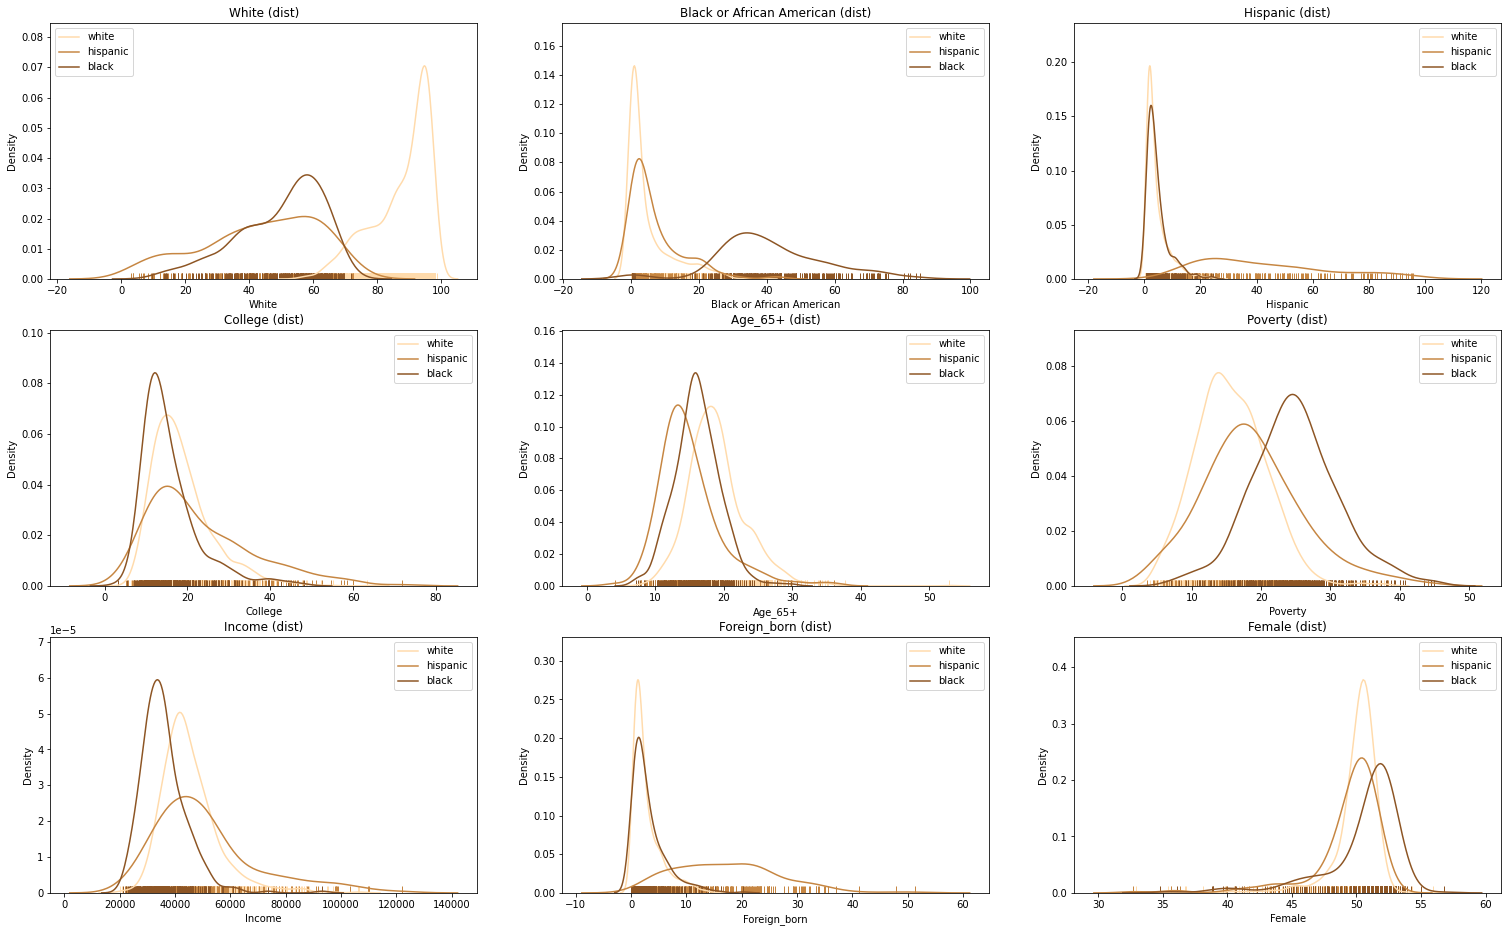

In [49]:
# setting skin color representing palette
colors = ["#FFDBAC", "#C68642", "#8D5524"]
sns.set_palette(sns.color_palette(colors))

#plotting demographics desities of all clusters
a = 3  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(26,16))
columns = ['White',	'Black or African American',	'Hispanic',	'College',	'Age_65+', 'Poverty', 'Income', 'Foreign_born', 'Female']

for i in columns:
    plt.subplot(a, b, c)
    plt.title('{} (dist)'.format(i))
    plt.xlabel(i)
    sns.distplot(white[i], hist=False, rug=True)
    sns.distplot(hispanic[i], hist=False, rug=True)
    sns.distplot(black[i], hist=False, rug=True)
    plt.legend(labels=['white', 'hispanic', 'black'])
    c = c + 1

plt.show()

In [50]:
# One hot encoding the clusters and joining the prior data for further analysis
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

enc_df = pd.DataFrame(enc.fit_transform(df_cluster[['k_cluster']]).toarray())
encoded_df = df_cluster.join(enc_df)
encoded_df = encoded_df.drop(columns=['k_cluster'])

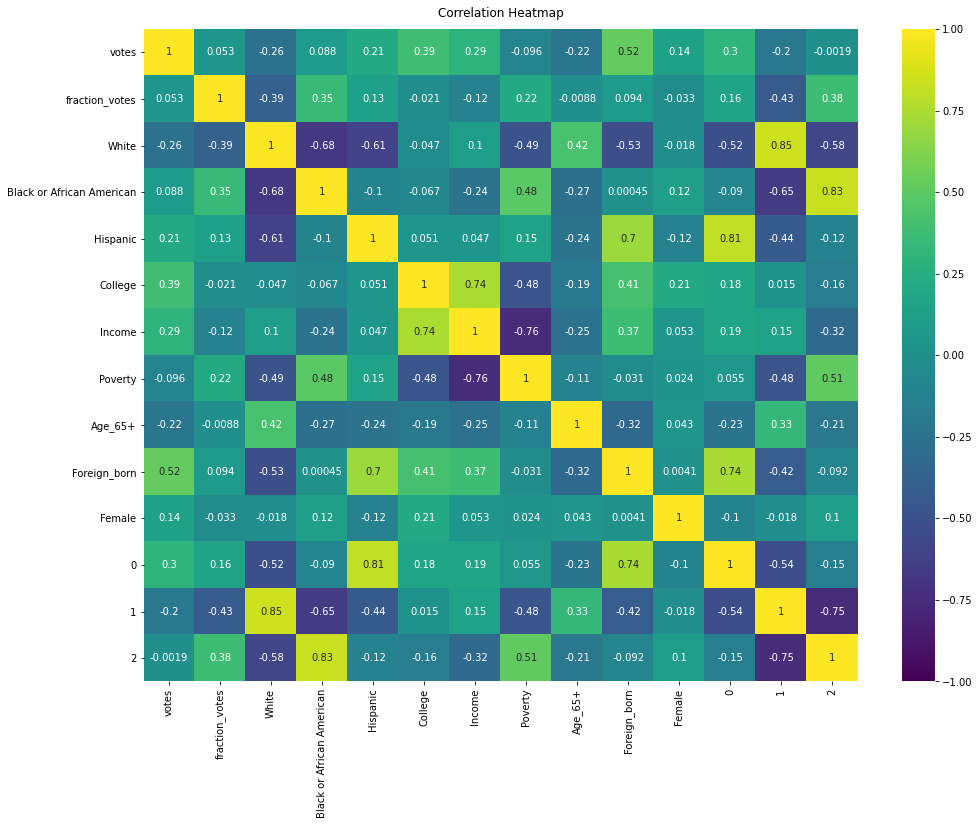

In [51]:
# heatmap showing correlation between variables
# 0, 1, 2 - our clusters of hispanic, white and black people

plt.figure(figsize=(16,12))

heatmap = sns.heatmap(encoded_df.corr(), vmin=-1,vmax=1, annot=True, cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

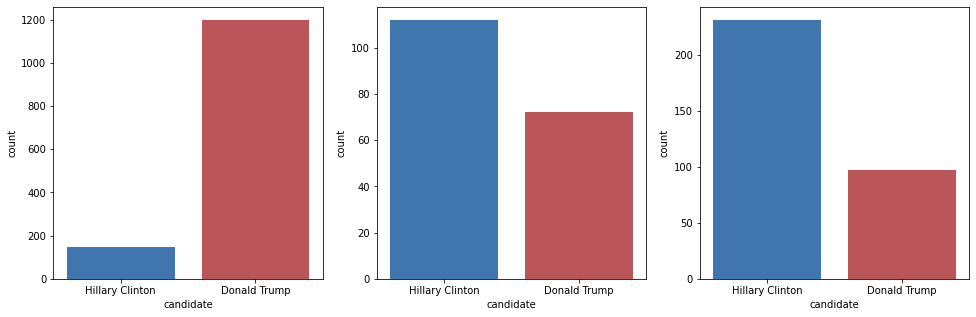

In [52]:
colors = ["#2E74C0", "#CB454A"]
sns.set_palette(sns.color_palette(colors))

#counties won of candidates in each group
datasets = [white, hispanic, black]

fig = plt.figure(figsize=(28,5))

a = 1  # number of rows
b = 5  # number of columns
c = 1

for i in datasets:
    plt.subplot(a, b, c)
    sns.countplot(x='candidate', data=i)
    c = c + 1

### Insights  
The data we have can be easily grouped into three clusters based on skin color.   
Those cluster are different:   
- average income is highest in hispanic group, lowest - in black. 
- poverty lever is highest among black people, and lowest among whites. 
- white people on average has more older people compared to hispanic and black groups.  Positive correlation between whites cluster and age_65+ proves it.
- whites are negatively correlated with foreign_born while hisanics - strongly positively.
Regarding candiate supported, we see that Donald Trump won in counties where most of the white poeple live while Hillary - in black counties.  

### Linear Model

In [53]:
# preparing data for regression
df_regression = two_winners.drop(columns=['state', 'state_abbreviation', 'county', 'party'])
df_regression.head()

,candidate,votes,fraction_votes,White,Black or African American,Hispanic,College,Income,Poverty,Age_65+,Foreign_born,Female
0,Hillary Clinton,2567,0.906,46.6,47.6,4.5,13.4,32911,26.7,16.5,2.9,46.6
1,Hillary Clinton,2451,0.913,22.1,70.1,7.5,12.5,32033,21.6,14.9,5.4,45.3
2,Hillary Clinton,2196,0.921,53.1,44.0,1.2,14.0,29918,28.4,18.0,0.8,53.6
3,Hillary Clinton,2899,0.886,56.8,39.5,2.0,11.8,32402,24.1,18.3,1.1,52.3
4,Hillary Clinton,1772,0.802,56.1,42.4,0.8,11.8,33941,21.5,20.8,0.3,52.5


In [54]:
#modeling logistic regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

le = LabelEncoder()

# independent variables
X = df_regression.loc[:,['White',	'Black or African American',	'Hispanic',	
            'College',	'Income',	'Poverty',	'Age_65+',	'Foreign_born',	'Female']].values

y = df_regression.candidate # dependent variable

# encoding dependent variable, asking to return categorical values after modeling
np.all(le.fit_transform(y) == np.unique(y, return_inverse=True)[1])

#spliting the data, training regression
X_train,X_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(X), y,test_size=0.2, random_state=0)

reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)

In [55]:
# checking the accuracy of the model on test data
print(reg.score(X_test, y_test).round(2))

0.91


In [56]:
# creating a data frame of actual and predicted candidates
results = pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})
results.head(20)

,predictions,actual
1070,Donald Trump,Donald Trump
473,Donald Trump,Donald Trump
1023,Donald Trump,Donald Trump
745,Donald Trump,Donald Trump
53,Donald Trump,Donald Trump
1052,Donald Trump,Donald Trump
1192,Donald Trump,Donald Trump
18,Hillary Clinton,Hillary Clinton
996,Donald Trump,Donald Trump
795,Hillary Clinton,Hillary Clinton


Our model has 91% accuracy to predict which candidate wins the county based on the demographical properties of the county - thats a great result!

### Suggestions / steps for Democrats

Democrats candidate Hillary Clinton had a really great support from black, younger and female. groups This might be explained by the rasistic expressions of Trump and anti-abortion policies of republicans. Also, it is natural that women wants to see a non-male president sitting in the Oval office.    
However, Hispanic people which Trump once called “rapists” and “killers” really support Trump. There is also a positive relation between fraction of people born abroad and Trump's votes received. 
Knowing this, democrats should:  
- try to **attract hispanic and abroad born people votes** by finding out what drives Latinos to support Trump. Reminding people rasistic expressions of Trump mighr help. Also, Hillary has a strong support from black - it can be used to create an image of minorities-supporting democrat candidate. 
- **maintain the support from female and black** people.
- **maintain suport from younger people** and try to get more votes from older people.
- even tough hardly possible, try to **steal some white people votes from Trump**.
- use all these suggestions above especially in swing states (not covered here), because the final result depends on those states.

